<h1 style='text-align: center;'> Natural Language Processing </h1>
<h4 style='text-align: center;'> Javier Vázquez</h4>


## Objectives:
### - Working with the IMDB's review dataset.
### - Use NLTK tools and Pandas to extract relevant information out of the database.
### - Create visualizations to explore data and provide useful insight.
### - Train a model to classify a review (or a text related to movies) into a positive or negative class.




# Loading requirements

### Loading the database and the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import  WordCloud
from PIL import Image
import string
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

%matplotlib inline
sns.set_style("darkgrid")

# Loading the first 
# movies = pd.read_csv("IMDB Dataset.csv").drop_duplicates()

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc).lower()
    
    # Now just remove any stopwords
    # [print(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    # return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return nopunc

# movies["review_nopunc"] = movies.review.apply(text_process)
# movies["review_clean"] = movies.review_nopunc.apply(lambda x: [word for word in x.split() if word.lower() not in stopwords.words('english')])

movies = pd.read_csv("clean_movies_database.csv",index_col=False).drop(["review","review_nopunc"],axis=1)
movies.review_clean = movies.review_clean.apply(lambda x: [word.strip(''' "[']''') for word in x.split(",")]) 

## EDA

#### Exploring the data to extract useful information out of it.

AxesSubplot(0.125,0.125;0.775x0.755)
positive    24884
negative    24698
Name: sentiment, dtype: int64


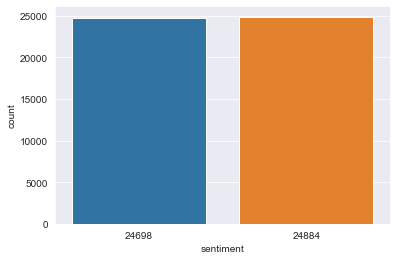

In [2]:
print(sns.countplot(data=movies.sentiment.value_counts(),x=movies.sentiment))
print(movies.sentiment.value_counts())

From the last computation it can be gathered that the database is balanced between positive and negative labels. This is great considering that this means that the dataset will require less pre-processing.

<AxesSubplot:ylabel='Frequency'>

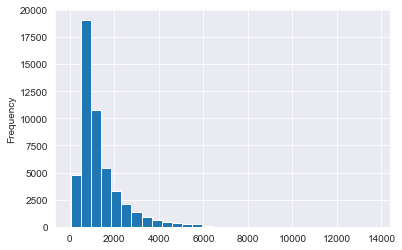

In [3]:
movies["length"]  = movies.review.apply(len)
movies.length.plot(bins=30,kind="hist")

In [49]:
movies.length.describe()

count    49582.000000
mean      1310.568230
std        990.762238
min         32.000000
25%        699.000000
50%        971.000000
75%       1592.000000
max      13704.000000
Name: length, dtype: float64

After very little feature engineering, we can extract the length of every review and assign it to every review. With this we're able to  tell that most messages' length range from 340 characters to 2301. There are significant outliers to this, but the mean length of the messages is 1310. 

# Creating a WordCloud 

This will help to visualize the frequency of some words, later it will be used on lemmas and different tokenization techniques. A word cloud is an image of words, commonly used to be a representation of the most common or important words found in a data set.

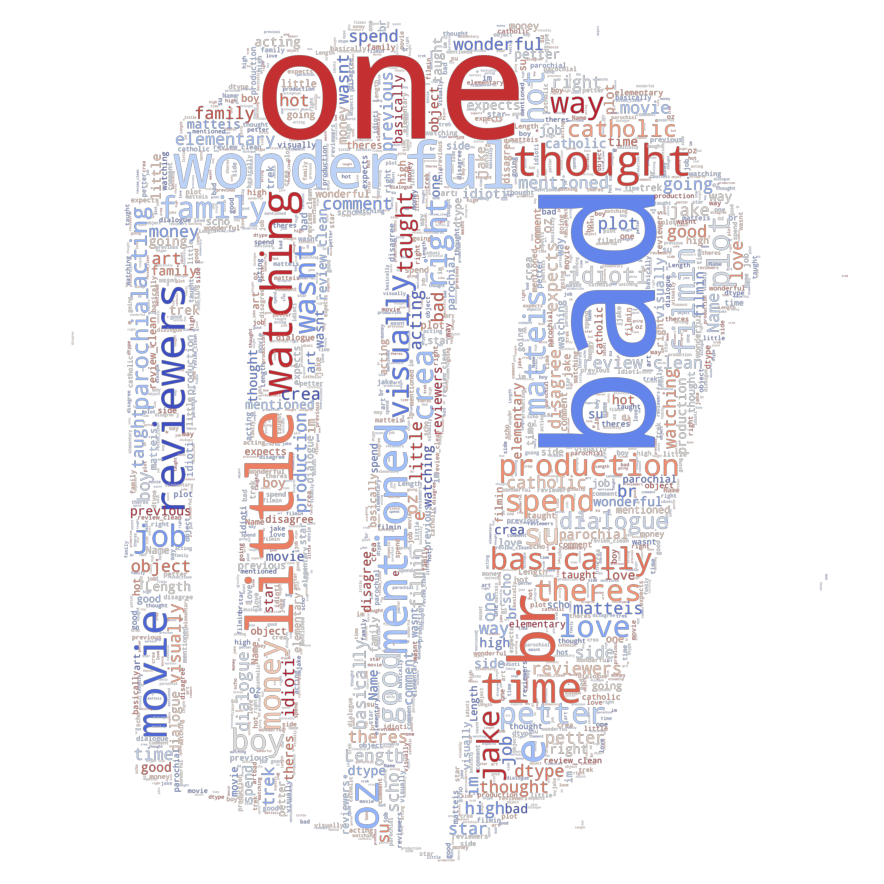

In [25]:
# Setting the size of the figure to be shown in the notebook
plt.figure(figsize=(18, 16))

# Array to create a mask used for the wordcloud. 
mask = np.array(Image.open(r"C:\Users\javie\Desktop\Python\Portfolio\imdbNLP\photo.png"))

# Create a WordCloud object that will get the parameters for editing and styling the word cloud.
cloud = WordCloud(background_color=None,
                prefer_horizontal=.5,
                colormap="coolwarm",
                stopwords = stopwords.words('english'),
                height=1080,width=1920,
                max_words=2000,
                mode = "RGBA",
                scale=4,
                # max_font_size=200,
                # relative_scaling=.8,
                repeat=True,
                # collocations= True,
                mask=mask,
                margin=1)
                
cloud.generate_from_text(str(movies.review_clean).replace("'",""))
for item in ["bad","br","oz","e","su","review_clean","Length","dtype","object"]:    
    cloud.words_.pop(item)
# cloud.generate(str(movies.review_clean[0:20000]).replace("'",""))
# cloud.to_file("movie3.png")

# Final editing on the PyPlot object which WordCloud works for as a wrapper.
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Keep reading on this subject on:

    https://www.datacamp.com/community/tutorials/wordcloud-python

# Lemmatization

There are many different ways to pre-process the data. One of the first steps taken on this dataset was removing stopwords and some punctuation marks. Lemmatization is an algorithm which will take in a word and assign it to its root. This is very similar to stemming, which is the process of removing suffixes and prefixes to get the "raw" basis of the word.

This is a bit more complex than my over-simplification but the result may vary depending on which kind of root you want to shift the bag of words to. You may either lemmatize to nouns, adjectives or verbs, which means that some words will be switched to the infinitive form if its a verb, plural and some suffixes if its a noun and simplify the adjectives. Using a lemmatizer may provide a different result depending on the project, but the best thing about using it, is that it returns an actual word. Thus, it will be simpler and cleaner to interpret it.  

Doing this will change the data set we're using in more than one way.

## Plotting distribution of occurences

Row 0 done!
Row 1 done!
Row 2 done!
Row 3 done!
Row 4 done!
Row 5 done!
Row 6 done!
Row 7 done!
Row 8 done!
Row 9 done!
Row 10 done!
Row 11 done!
Row 12 done!
Row 13 done!
Row 14 done!
Row 15 done!
Row 16 done!
Row 17 done!
Row 18 done!
Row 19 done!
Row 20 done!
Row 21 done!
Row 22 done!
Row 23 done!
Row 24 done!
Row 25 done!
Row 26 done!
Row 27 done!
Row 28 done!
Row 29 done!
Row 30 done!
Row 31 done!
Row 32 done!
Row 33 done!
Row 34 done!
Row 35 done!
Row 36 done!
Row 37 done!
Row 38 done!
Row 39 done!
Row 40 done!
Row 41 done!
Row 42 done!
Row 43 done!
Row 44 done!
Row 45 done!
Row 46 done!
Row 47 done!
Row 48 done!
Row 49 done!
Row 50 done!
Row 51 done!
Row 52 done!
Row 53 done!
Row 54 done!
Row 55 done!
Row 56 done!
Row 57 done!
Row 58 done!
Row 59 done!
Row 60 done!
Row 61 done!
Row 62 done!
Row 63 done!
Row 64 done!
Row 65 done!
Row 66 done!
Row 67 done!
Row 68 done!
Row 69 done!
Row 70 done!
Row 71 done!
Row 72 done!
Row 73 done!
Row 74 done!
Row 75 done!
Row 76 done!
Row 77 do

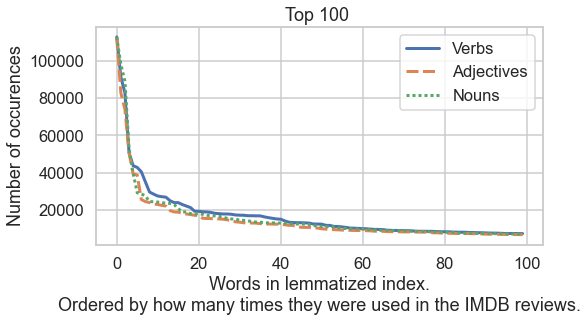

In [6]:
# Create an instance of the lemmatizer to be used and create variables which will hold the different lemmatized database.
lemmatizer = WordNetLemmatizer()

bag_of_verbs = []
bag_of_nouns = []
bag_of_adjectives = []

for i in range(len(movies["review_clean"])):
    for word in movies["review_clean"][i]:
        word1 = lemmatizer.lemmatize(word,pos="v")
        word2 = lemmatizer.lemmatize(word,pos="a")
        word3 = lemmatizer.lemmatize(word,pos="n")
        bag_of_verbs.append(word1)
        bag_of_adjectives.append(word2)
        bag_of_nouns.append(word3)
    print(f"Row {i} done!")

print(bag_of_verbs[:10])
c_v = Counter(bag_of_verbs)
counted_verbs = c_v.most_common()
top_10_percent = int(len(counted_verbs)/10)

print(bag_of_adjectives[:10])
c_a = Counter(bag_of_adjectives)
counted_adjectives = c_a.most_common()
top_10_percent = int(len(counted_adjectives)/10)

print(bag_of_nouns[:10])
c_n = Counter(bag_of_nouns)
counted_nouns = c_n.most_common()
top_10_percent = int(len(counted_nouns)/10)

# for item in ["bad","br","oz","e","su","review_clean","Length","dtype","object"]:
#     if item in counted_adjectives.keys():
#         counted_adjectives.pop(item)


top_10_verbs = counted_verbs[0:int(top_10_percent)]
top_10_adjectives = counted_adjectives[0:int(top_10_percent)]
top_10_nouns = counted_nouns[0:int(top_10_percent)]


fx = [v for k,v in top_10_verbs[0:1600]]
fx2 = [v for k,v in top_10_adjectives[0:1600]]
fx3 = [v for k,v in top_10_nouns[0:1600]]

# fxtest = [(25000*np.sin(x/200)+50000) for x in fx[0:100]]
plt.figure(figsize=(8,4))
sns.set_theme(context='talk',
                     style='whitegrid',
                     palette='deep',
                     font='Arial',
                     font_scale=1,
                    #  color_codes=True,
                     rc={"lines.linewidth": 3})
sns.lineplot(data=[fx[0:100],fx2[0:100],fx3[0:100]])
# plt.xticks(("0","50","100","150","200","250","","","400"))
# plt.xticks(ticks=(0,50,100,150,200,250,325,400),
#             labels=(0,50,100,150,200,250,"and so...",1))
plt.title("Top 100 ")
plt.xlabel("Words in lemmatized index.\nOrdered by how many times they were used in the IMDB reviews.")
plt.ylabel("Number of occurences")
plt.legend(["Verbs","Adjectives","Nouns"])
plt.savefig("top100words.png",dpi=500,format="png",transparent=False)

# Training a model.

 This is SVM Classifier trained on half the data set. Lemmatization is very useful on the text preprocessing for building a model, for the sake of the exercise, I'll work with the bag of words made out of verbs. 

## Lemmatization on verbs

In [7]:
bag_of_verbs = []

for i in range(len(movies["review_clean"])):
    for word in movies["review_clean"][i]:
        word = lemmatizer.lemmatize(word,pos="v")
        # word = lemmatizer.lemmatize(word,pos="a")
        # word = lemmatizer.lemmatize(word,pos="n")
        bag_of_verbs.append(word)
    print(f"Row {i} done!")

print(bag_of_verbs[:10])

c_v = Counter(bag_of_verbs)
print(c_v.most_common(20))
print(len(c_v))

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X = movies.review_clean[0:25000]
y = movies.sentiment[0:25000]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")


vectorizer = CountVectorizer(stop_words="english",binary=False)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X.apply(str))
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train.apply(str))
y_train_vectors = vectorizer.transform(y_train.apply(str))
X_test_vectors = vectorizer.transform(X_test.apply(str))
y_test_vectors = vectorizer.transform(y_test.apply(str))
print("Train/test split fitted into the bag of words vector.\n")


model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

data_sample = movies[25001:]

X_val_vectors = vectorizer.transform(data_sample.review_clean.apply(str))
y_val_vectors = vectorizer.transform(data_sample.sentiment)

predictions_newdata = model.predict(X_val_vectors)
print("Model fitted with testing vectors.\n")


Row 0 done!
Row 1 done!
Row 2 done!
Row 3 done!
Row 4 done!
Row 5 done!
Row 6 done!
Row 7 done!
Row 8 done!
Row 9 done!
Row 10 done!
Row 11 done!
Row 12 done!
Row 13 done!
Row 14 done!
Row 15 done!
Row 16 done!
Row 17 done!
Row 18 done!
Row 19 done!
Row 20 done!
Row 21 done!
Row 22 done!
Row 23 done!
Row 24 done!
Row 25 done!
Row 26 done!
Row 27 done!
Row 28 done!
Row 29 done!
Row 30 done!
Row 31 done!
Row 32 done!
Row 33 done!
Row 34 done!
Row 35 done!
Row 36 done!
Row 37 done!
Row 38 done!
Row 39 done!
Row 40 done!
Row 41 done!
Row 42 done!
Row 43 done!
Row 44 done!
Row 45 done!
Row 46 done!
Row 47 done!
Row 48 done!
Row 49 done!
Row 50 done!
Row 51 done!
Row 52 done!
Row 53 done!
Row 54 done!
Row 55 done!
Row 56 done!
Row 57 done!
Row 58 done!
Row 59 done!
Row 60 done!
Row 61 done!
Row 62 done!
Row 63 done!
Row 64 done!
Row 65 done!
Row 66 done!
Row 67 done!
Row 68 done!
Row 69 done!
Row 70 done!
Row 71 done!
Row 72 done!
Row 73 done!
Row 74 done!
Row 75 done!
Row 76 done!
Row 77 do

In [8]:
print(f" --- Classification report for {model}")
print(classification_report(data_sample.sentiment, predictions_newdata))

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86     12212
    positive       0.86      0.86      0.86     12369

    accuracy                           0.86     24581
   macro avg       0.86      0.86      0.86     24581
weighted avg       0.86      0.86      0.86     24581



In [9]:
print(c_v.most_common(20))
print(len(c_v))

[('br', 112957), ('film', 91438), ('movie', 82849), ('one', 50640), ('make', 43692), ('like', 42733), ('see', 40409), ('get', 34923), ('time', 29497), ('good', 28369), ('character', 27370), ('watch', 27003), ('go', 26734), ('even', 24833), ('would', 23826), ('think', 23796), ('really', 22778), ('story', 21948), ('show', 21160), ('well', 19159)]
168339


### Lemmatization on adjectives

In [10]:
bag_of_adj = []

for i in range(len(movies["review_clean"])):
    for word in movies["review_clean"][i]:
        # word = lemmatizer.lemmatize(word,pos="v")
        word = lemmatizer.lemmatize(word,pos="a")
        # word = lemmatizer.lemmatize(word,pos="n")
        bag_of_adj.append(word)
    print(f"Row {i} done!")

# print(bag_of_adj[:10])

c_a = Counter(bag_of_adj)
print(c_a.most_common(20))
print(len(c_a))

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X = movies.review_clean[0:25000]
y = movies.sentiment[0:25000]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")


vectorizer = CountVectorizer(stop_words="english",binary=False)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X.apply(str))
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train.apply(str))
y_train_vectors = vectorizer.transform(y_train.apply(str))
X_test_vectors = vectorizer.transform(X_test.apply(str))
y_test_vectors = vectorizer.transform(y_test.apply(str))
print("Train/test split fitted into the bag of words vector.\n")


model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

data_sample = movies[25001:]

X_val_vectors = vectorizer.transform(data_sample.review_clean.apply(str))
y_val_vectors = vectorizer.transform(data_sample.sentiment)

predictions_newdata = model.predict(X_val_vectors)
print("Model fitted with testing vectors.\n")
# print(f" --- Classification report for {model}")
# print(classification_report(data_sample.sentiment, predictions_newdata))

Row 0 done!
Row 1 done!
Row 2 done!
Row 3 done!
Row 4 done!
Row 5 done!
Row 6 done!
Row 7 done!
Row 8 done!
Row 9 done!
Row 10 done!
Row 11 done!
Row 12 done!
Row 13 done!
Row 14 done!
Row 15 done!
Row 16 done!
Row 17 done!
Row 18 done!
Row 19 done!
Row 20 done!
Row 21 done!
Row 22 done!
Row 23 done!
Row 24 done!
Row 25 done!
Row 26 done!
Row 27 done!
Row 28 done!
Row 29 done!
Row 30 done!
Row 31 done!
Row 32 done!
Row 33 done!
Row 34 done!
Row 35 done!
Row 36 done!
Row 37 done!
Row 38 done!
Row 39 done!
Row 40 done!
Row 41 done!
Row 42 done!
Row 43 done!
Row 44 done!
Row 45 done!
Row 46 done!
Row 47 done!
Row 48 done!
Row 49 done!
Row 50 done!
Row 51 done!
Row 52 done!
Row 53 done!
Row 54 done!
Row 55 done!
Row 56 done!
Row 57 done!
Row 58 done!
Row 59 done!
Row 60 done!
Row 61 done!
Row 62 done!
Row 63 done!
Row 64 done!
Row 65 done!
Row 66 done!
Row 67 done!
Row 68 done!
Row 69 done!
Row 70 done!
Row 71 done!
Row 72 done!
Row 73 done!
Row 74 done!
Row 75 done!
Row 76 done!
Row 77 do

In [11]:
print(f" --- Classification report for {model}")
print(classification_report(data_sample.sentiment, predictions_newdata))

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.86      0.85      0.85     12212
    positive       0.85      0.86      0.86     12369

    accuracy                           0.86     24581
   macro avg       0.86      0.86      0.86     24581
weighted avg       0.86      0.86      0.86     24581



In [12]:
print(c_a.most_common(20))
print(len(c_a))

[('br', 112957), ('movie', 82849), ('film', 73928), ('one', 50640), ('good', 39325), ('like', 38669), ('bad', 25477), ('even', 24370), ('would', 23826), ('time', 23067), ('really', 22778), ('see', 22329), ('story', 21948), ('great', 19551), ('much', 18783), ('well', 18679), ('get', 18058), ('also', 17692), ('people', 17376), ('first', 17004)]
180848


### Lemmatization on nouns

In [13]:
bag_of_nouns = []

for i in range(len(movies["review_clean"])):
    for word in movies["review_clean"][i]:
        # word = lemmatizer.lemmatize(word,pos="v")
        # word = lemmatizer.lemmatize(word,pos="a")
        word = lemmatizer.lemmatize(word,pos="n")
        bag_of_nouns.append(word)
    print(f"Row {i} done!")

# print(bag_of_nouns[:10])

c_n = Counter(bag_of_nouns)
print(c_n.most_common(20))
print(len(c_n))

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X = movies.review_clean[0:25000]
y = movies.sentiment[0:25000]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")


vectorizer = CountVectorizer(stop_words="english",binary=False)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X.apply(str))
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train.apply(str))
y_train_vectors = vectorizer.transform(y_train.apply(str))
X_test_vectors = vectorizer.transform(X_test.apply(str))
y_test_vectors = vectorizer.transform(y_test.apply(str))
print("Train/test split fitted into the bag of words vector.\n")


model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

data_sample = movies[25001:]

X_val_vectors = vectorizer.transform(data_sample.review_clean.apply(str))
y_val_vectors = vectorizer.transform(data_sample.sentiment)

predictions_newdata = model.predict(X_val_vectors)
print("Model fitted with testing vectors.\n")
# print(f" --- Classification report for {model}")
# print(classification_report(data_sample.sentiment, predictions_newdata))

Row 0 done!
Row 1 done!
Row 2 done!
Row 3 done!
Row 4 done!
Row 5 done!
Row 6 done!
Row 7 done!
Row 8 done!
Row 9 done!
Row 10 done!
Row 11 done!
Row 12 done!
Row 13 done!
Row 14 done!
Row 15 done!
Row 16 done!
Row 17 done!
Row 18 done!
Row 19 done!
Row 20 done!
Row 21 done!
Row 22 done!
Row 23 done!
Row 24 done!
Row 25 done!
Row 26 done!
Row 27 done!
Row 28 done!
Row 29 done!
Row 30 done!
Row 31 done!
Row 32 done!
Row 33 done!
Row 34 done!
Row 35 done!
Row 36 done!
Row 37 done!
Row 38 done!
Row 39 done!
Row 40 done!
Row 41 done!
Row 42 done!
Row 43 done!
Row 44 done!
Row 45 done!
Row 46 done!
Row 47 done!
Row 48 done!
Row 49 done!
Row 50 done!
Row 51 done!
Row 52 done!
Row 53 done!
Row 54 done!
Row 55 done!
Row 56 done!
Row 57 done!
Row 58 done!
Row 59 done!
Row 60 done!
Row 61 done!
Row 62 done!
Row 63 done!
Row 64 done!
Row 65 done!
Row 66 done!
Row 67 done!
Row 68 done!
Row 69 done!
Row 70 done!
Row 71 done!
Row 72 done!
Row 73 done!
Row 74 done!
Row 75 done!
Row 76 done!
Row 77 do

In [14]:
print(f" --- Classification report for {model}")
print(classification_report(data_sample.sentiment, predictions_newdata))

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86     12212
    positive       0.86      0.86      0.86     12369

    accuracy                           0.86     24581
   macro avg       0.86      0.86      0.86     24581
weighted avg       0.86      0.86      0.86     24581



In [15]:
print(c_n.most_common(20))
print(len(c_n))

[('br', 112957), ('movie', 98217), ('film', 89121), ('one', 52903), ('like', 39608), ('time', 29101), ('good', 28482), ('character', 27370), ('even', 24371), ('get', 24261), ('story', 24101), ('would', 23826), ('make', 23436), ('see', 23383), ('really', 22778), ('scene', 20559), ('well', 18811), ('much', 18783), ('people', 17870), ('great', 17774)]
170374


## SUPER LEMMATIZED MODEL MK 1
###     a.k.a. Multiple-Layered Lemmatization


Smallest bag of words out of the other three.
Keeps high f1-scores.

In [16]:
bag_of_words = []

for i in range(len(movies["review_clean"][0:25000])):
    for word in movies["review_clean"][i]:
        word = lemmatizer.lemmatize(word,pos="a")
        word = lemmatizer.lemmatize(word,pos="n")
        word = lemmatizer.lemmatize(word,pos="v")
        bag_of_words.append(word)
    print(f"Row {i} done!")

# print(bag_of_verbs[:10])

c = Counter(bag_of_words)
print(c.most_common(20))
print(len(c))

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X = movies.review_clean[0:25000]
y = movies.sentiment[0:25000]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")


vectorizer = CountVectorizer(stop_words="english",binary=False)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X.apply(str))
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train.apply(str))
y_train_vectors = vectorizer.transform(y_train.apply(str))
X_test_vectors = vectorizer.transform(X_test.apply(str))
y_test_vectors = vectorizer.transform(y_test.apply(str))
print("Train/test split fitted into the bag of words vector.\n")


model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

data_sample = movies[25001:]

X_val_vectors = vectorizer.transform(data_sample.review_clean.apply(str))
y_val_vectors = vectorizer.transform(data_sample.sentiment)

predictions_newdata = model.predict(X_val_vectors)
print("Model fitted with testing vectors.\n")
# print(f" --- Classification report for {model}")
# print(classification_report(data_sample.sentiment, predictions_newdata))

Row 0 done!
Row 1 done!
Row 2 done!
Row 3 done!
Row 4 done!
Row 5 done!
Row 6 done!
Row 7 done!
Row 8 done!
Row 9 done!
Row 10 done!
Row 11 done!
Row 12 done!
Row 13 done!
Row 14 done!
Row 15 done!
Row 16 done!
Row 17 done!
Row 18 done!
Row 19 done!
Row 20 done!
Row 21 done!
Row 22 done!
Row 23 done!
Row 24 done!
Row 25 done!
Row 26 done!
Row 27 done!
Row 28 done!
Row 29 done!
Row 30 done!
Row 31 done!
Row 32 done!
Row 33 done!
Row 34 done!
Row 35 done!
Row 36 done!
Row 37 done!
Row 38 done!
Row 39 done!
Row 40 done!
Row 41 done!
Row 42 done!
Row 43 done!
Row 44 done!
Row 45 done!
Row 46 done!
Row 47 done!
Row 48 done!
Row 49 done!
Row 50 done!
Row 51 done!
Row 52 done!
Row 53 done!
Row 54 done!
Row 55 done!
Row 56 done!
Row 57 done!
Row 58 done!
Row 59 done!
Row 60 done!
Row 61 done!
Row 62 done!
Row 63 done!
Row 64 done!
Row 65 done!
Row 66 done!
Row 67 done!
Row 68 done!
Row 69 done!
Row 70 done!
Row 71 done!
Row 72 done!
Row 73 done!
Row 74 done!
Row 75 done!
Row 76 done!
Row 77 do

In [26]:
print(f" --- Classification report for {model}")
print(classification_report(data_sample.sentiment, predictions_newdata))

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.86      0.85      0.86     12212
    positive       0.86      0.86      0.86     12369

    accuracy                           0.86     24581
   macro avg       0.86      0.86      0.86     24581
weighted avg       0.86      0.86      0.86     24581



In [18]:
print(c.most_common(20))
print(len(c))

[('br', 57339), ('movie', 49744), ('film', 46205), ('one', 26606), ('make', 22137), ('like', 21605), ('see', 20352), ('good', 20009), ('get', 17733), ('time', 14857), ('character', 13776), ('watch', 13531), ('go', 13403), ('bad', 12876), ('even', 12531), ('would', 12163), ('story', 12150), ('think', 12131), ('really', 11338), ('show', 10689)]
105600


# Saving the model

#### For future use and to be time efficient.
The very nature of word processing implies the explosiveness of the data sample dimensionality. More words will mean more calculations, which means more time required to execute them by the computer. This requires a lot of computational power. Therefore, it is always a good idea to be able to save results into a file that could be called upon at any given time.


In [28]:

with open('pickle_model.pickle', 'wb') as f:
    pickle.dump(model, f)
    
with open('pickle_model.pickle', 'rb') as g:
    loaded_model = pickle.load(g)

# Sources

    KG:     https://www.youtube.com/watch?v=M9Itm95JzL0   (watched this completely)
    KG:     https://www.youtube.com/watch?v=vyOgWhwUmec
    FCC:    https://www.youtube.com/watch?v=X2vAabgKiuM
    DS:     https://www.youtube.com/watch?v=hHr_cBKkRfQ
    SDX:    https://www.youtube.com/playlist?list=PLQVvvaa0QuDf2JswnfiGkliBInZnIC4HL
    PyO:    https://www.youtube.com/watch?v=xvqsFTUsOmc

    https://www.kdnuggets.com/2019/01/solve-90-nlp-problems-step-by-step-guide.html


# Model testing

## The following code snipets are merely for testing purposes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
import pickle

sns.set_style("darkgrid")

with open('pickle_model.pickle', 'rb') as g:
    loaded_model = pickle.load(g)

movies = pd.read_csv("IMDB Dataset.csv").drop_duplicates()
movies

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[49582 rows x 2 columns]

In [8]:
X = movies.review
y = movies.sentiment
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")

vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")

predictions = loaded_model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {loaded_model}")
print (classification_report(y_test, predictions))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.97      0.97      0.97      4949
    positive       0.97      0.97      0.97      4968

    accuracy                           0.97      9917
   macro avg       0.97      0.97      0.97      9917
weighted avg       0.97      0.97      0.97      9917



## Predictions

#### Set up different variables to fine tune the model

In [4]:
from sklearn.model_selection import train_test_split

X = movies.review
y = movies.sentiment
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english",binary=False)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")

from sklearn.metrics import classification_report
predictions = loaded_model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {loaded_model}")
print (classification_report(y_test, predictions))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.93      0.96      0.95      4850
    positive       0.96      0.93      0.95      5067

    accuracy                           0.95      9917
   macro avg       0.95      0.95      0.95      9917
weighted avg       0.95      0.95      0.95      9917



# TF/IDF Model setup

In [25]:
movies = movies[0:10000]

In [3]:
bow_transformer = CountVectorizer(stop_words="english",binary=False).fit(movies.review)

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

101583


In [5]:
movies_review = bow_transformer.transform(movies['review'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(movies_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
X=movies.review
y=movies.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")


vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X_train)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")


model = TfidfTransformer()
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
# print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))



Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model created, currently using:      TfidfTransformer()

Model fitted with training vectors.



AttributeError: 'TfidfTransformer' object has no attribute 'predict'

# Text Generation and

    https://www.youtube.com/watch?v=MGVdu39gT6k
    https://www.youtube.com/watch?v=NYkbqzTlW3w